<a href="https://colab.research.google.com/github/emaakter0/DataScience/blob/main/Cat_Vs_Dog_Image_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/



In [20]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [21]:
import zipfile

# Open the zip file in read mode
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')

# Extract all the contents into the directory
zip_ref.extractall('/content')

# Close the file reference
zip_ref.close()


In [23]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout





In [24]:
import zipfile
import os

# Define paths for train data
train_zip_path = '/content/train.zip'
train_extraction_dir = '/content/train'

# Create directory for train data if it doesn't exist
if not os.path.exists(train_extraction_dir):
    os.makedirs(train_extraction_dir)

# Extract train.zip
print(f"Extracting '{train_zip_path}' to '{train_extraction_dir}'...")
with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
    zip_ref.extractall(train_extraction_dir)
print("Train data extraction complete.")

# Define paths for validation data
test_zip_path = '/content/test1.zip' # Assuming test data is in test1.zip as per Kaggle
test_extraction_dir = '/content/test'

# Create directory for validation data if it doesn't exist
if not os.path.exists(test_extraction_dir):
    os.makedirs(test_extraction_dir)

# Extract test1.zip
print(f"Extracting '{test_zip_path}' to '{test_extraction_dir}'...")
with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
    zip_ref.extractall(test_extraction_dir)
print("Test data extraction complete.")


Extracting '/content/train.zip' to '/content/train'...
Train data extraction complete.
Extracting '/content/test1.zip' to '/content/test'...
Test data extraction complete.


In [25]:
#generators

train_ds = keras.utils.image_dataset_from_directory(

directory = '/content/train',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(

directory = '/content/test',

labels='inferred',

label_mode = 'int',

batch_size=32,

image_size=(256,256)

)

Found 25000 files belonging to 1 classes.
Found 12500 files belonging to 1 classes.


In [26]:
# Normalize

def process(image, label):

    image = tf.cast(image/255.  ,tf.float32)

    return image,label

train_ds = train_ds.map(process)

validation_ds = validation_ds.map(process)

In [27]:
#create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense (64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense (1, activation='sigmoid'))

In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [30]:
history = model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 89s 106ms/step - accuracy: 0.9939 - loss: 0.0398 - val_accuracy: 0.9999 - val_loss: 1.3443e-04
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 96ms/step - accuracy: 1.0000 - loss: 9.3325e-12 - val_accuracy: 1.0000 - val_loss: 1.6516e-06
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 1.0000 - loss: 4.0515e-17 - val_accuracy: 1.0000 - val_loss: 1.5653e-06
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 1.0000 - loss: 2.7720e-20 - val_accuracy: 1.0000 - val_loss: 3.0936e-06
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 1.0000 - loss: 5.1544e-17 - val_accuracy: 1.0000 - val_loss: 1.1764e-06
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 97ms/step - accuracy: 1.0000 - loss: 3.7326e-13 - val_accuracy: 1.0000 - val_loss: 1.6021e-06
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 129ms/step - accuracy: 1.0000 - loss: 4.5306e-21 - val_accuracy: 1.0000 - val_loss: 3.3019e-06
Epoch 8/10
782/782 ━━━━━━━━━━━━━━

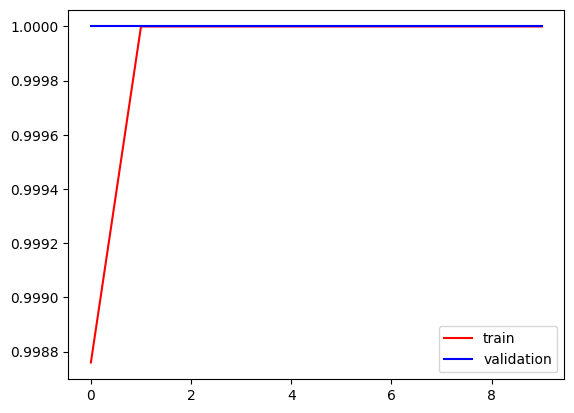

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')

plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()

plt.show()

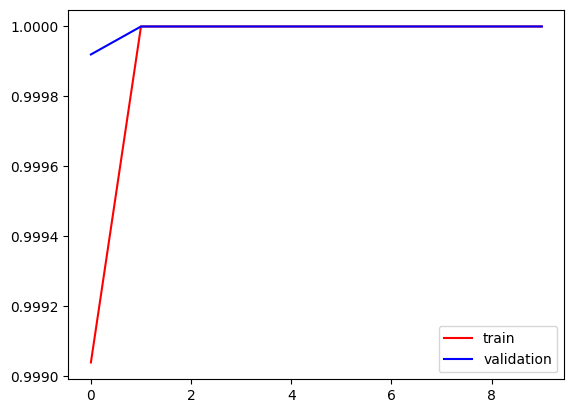

In [31]:
plt.plot(history.history['accuracy'], color='red', label='train')

plt.plot(history.history['val_accuracy'], color='blue', label='validation')

plt.legend()

plt.show()



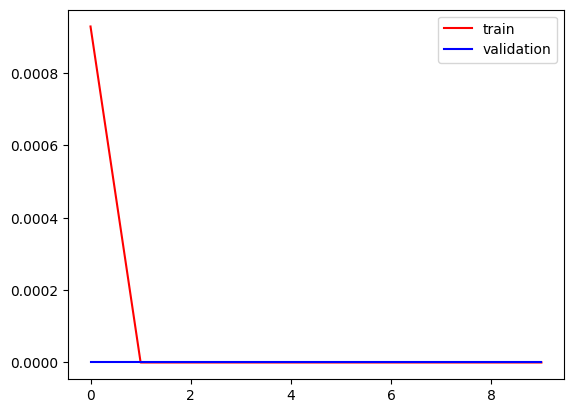

In [17]:
plt.plot(history.history['loss'], color='red', label='train')

plt.plot(history.history['val_loss'], color='blue', label='validation')

plt.legend()

plt.show()

In [85]:
import cv2

In [92]:
test_img = cv2.imread('/content/Are-all-ginger-cats-male-1024x683.jpg')





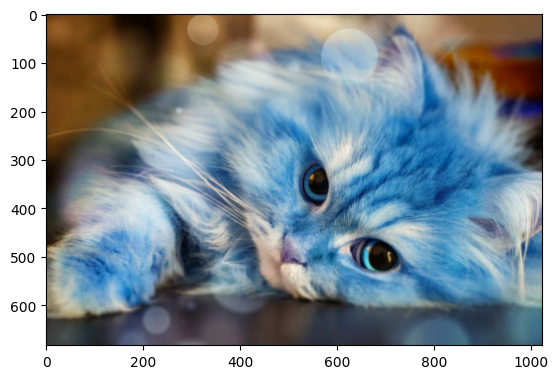

In [93]:
plt.imshow(test_img)

In [94]:
test_img.shape

(683, 1024, 3)

In [95]:
test_img = cv2.resize(test_img, (256,256))

In [96]:
test_input = test_img.reshape((1,256,256,3))

In [97]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


array([[0.]], dtype=float32)